# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
weather_api_key

'bf0bd8845b15dfbd0a56fa2ef3ad3d76'

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?&units=Metric&appid=" + weather_api_key
#url = "http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid={weather_api_key}"

params = {
    "api_keys": weather_api_key
}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = url + "&q=" + city
    city_url = url + "&q=" + cities[i]
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url, params=params).json()
        #city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
       
   
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | codrington
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | utrik
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | happy valley-goose bay
Processing Record 10 of Set 1 | port lincoln
Processing Record 11 of Set 1 | mejit
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | vorgashor
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | hayma'
City not found. Skipping...
Processing Record 19 of Set 1 | kattivakkam
Processing Record 20 of Set 1 | port-aux-francais
Processing Rec

Processing Record 38 of Set 4 | colonia
Processing Record 39 of Set 4 | three rivers
Processing Record 40 of Set 4 | sept-iles
Processing Record 41 of Set 4 | syracuse
Processing Record 42 of Set 4 | wagar
Processing Record 43 of Set 4 | musay'id
City not found. Skipping...
Processing Record 44 of Set 4 | mount gambier
Processing Record 45 of Set 4 | dabou
Processing Record 46 of Set 4 | princeville
Processing Record 47 of Set 4 | keflavik
Processing Record 48 of Set 4 | rockport
Processing Record 49 of Set 4 | prince rupert
Processing Record 0 of Set 5 | hanzhong
Processing Record 1 of Set 5 | tazacorte
Processing Record 2 of Set 5 | kyzyl-suu
Processing Record 3 of Set 5 | avarua
Processing Record 4 of Set 5 | katsuren-haebaru
Processing Record 5 of Set 5 | san sebastian de la gomera
Processing Record 6 of Set 5 | 'ohonua
City not found. Skipping...
Processing Record 7 of Set 5 | uturoa
Processing Record 8 of Set 5 | udachny
Processing Record 9 of Set 5 | san patricio
Processing Reco

Processing Record 34 of Set 8 | constantia
Processing Record 35 of Set 8 | alekseyevka
Processing Record 36 of Set 8 | reggane
Processing Record 37 of Set 8 | fort mcmurray
Processing Record 38 of Set 8 | san jose village
City not found. Skipping...
Processing Record 39 of Set 8 | al qadarif
Processing Record 40 of Set 8 | vila velha
Processing Record 41 of Set 8 | rakops
Processing Record 42 of Set 8 | northam
Processing Record 43 of Set 8 | ust-tsilma
Processing Record 44 of Set 8 | masjed soleyman
Processing Record 45 of Set 8 | yuzhno-kurilsk
Processing Record 46 of Set 8 | katsuura
Processing Record 47 of Set 8 | lihue
Processing Record 48 of Set 8 | ust-nera
Processing Record 49 of Set 8 | laojunmiao
Processing Record 0 of Set 9 | niquero
Processing Record 1 of Set 9 | robertsport
Processing Record 2 of Set 9 | cabo san lucas
Processing Record 3 of Set 9 | ilhabela
Processing Record 4 of Set 9 | inarajan village
Processing Record 5 of Set 9 | basco
Processing Record 6 of Set 9 | 

Processing Record 23 of Set 12 | mandera
Processing Record 24 of Set 12 | jaguey grande
Processing Record 25 of Set 12 | kerikeri
Processing Record 26 of Set 12 | viedma
Processing Record 27 of Set 12 | berezovo
Processing Record 28 of Set 12 | preobrazheniye
Processing Record 29 of Set 12 | cannonvale
Processing Record 30 of Set 12 | palpa
Processing Record 31 of Set 12 | petukhovo
Processing Record 32 of Set 12 | qamdo
Processing Record 33 of Set 12 | gebeit
Processing Record 34 of Set 12 | muravlenko
Processing Record 35 of Set 12 | talara
Processing Record 36 of Set 12 | tucuma
Processing Record 37 of Set 12 | pascagoula
Processing Record 38 of Set 12 | ridgecrest
Processing Record 39 of Set 12 | bereznehuvate
Processing Record 40 of Set 12 | mount pleasant
Processing Record 41 of Set 12 | edgewater
Processing Record 42 of Set 12 | guankou
Processing Record 43 of Set 12 | sao felix do xingu
Processing Record 44 of Set 12 | ajjampur
Processing Record 45 of Set 12 | nedumangad
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
len(city_data_df)

577

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,7.80,78,82,3.56,NZ,1684874557
1,puerto natales,-51.7236,-72.4875,4.25,75,40,2.06,CL,1684874557
2,grytviken,-54.2811,-36.5092,2.39,85,42,5.05,GS,1684874557
3,codrington,-38.2667,141.9667,12.86,72,100,6.02,AU,1684873972
4,waitangi,-43.9535,-176.5597,12.12,96,0,0.45,NZ,1684874557


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,7.80,78,82,3.56,NZ,1684874557
1,puerto natales,-51.7236,-72.4875,4.25,75,40,2.06,CL,1684874557
2,grytviken,-54.2811,-36.5092,2.39,85,42,5.05,GS,1684874557
3,codrington,-38.2667,141.9667,12.86,72,100,6.02,AU,1684873972
4,waitangi,-43.9535,-176.5597,12.12,96,0,0.45,NZ,1684874557


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

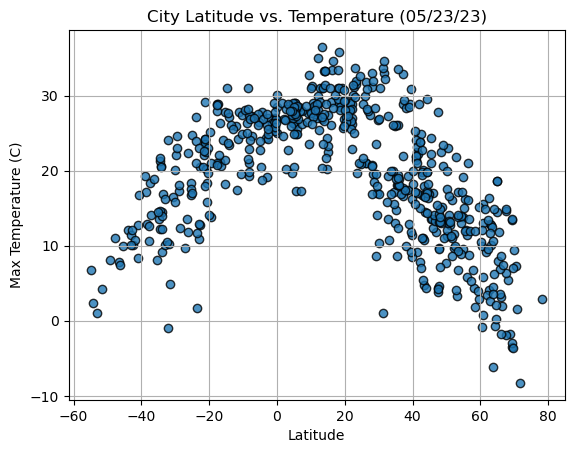

In [8]:
# Build scatter plot for latitude vs. temperature
#plt.scatter(Lat, Max Temp, edgecolor="black", linewidth=2, marker="o"), alpha==0.8, label=="Cities"

x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.grid(True)
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)



# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%x"))
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

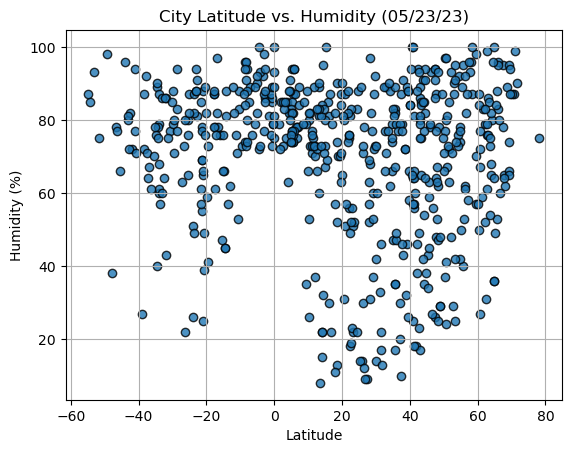

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.grid(True)
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

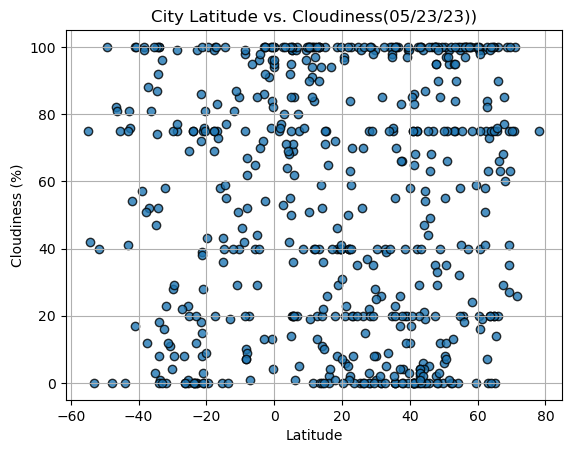

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness(%s))" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

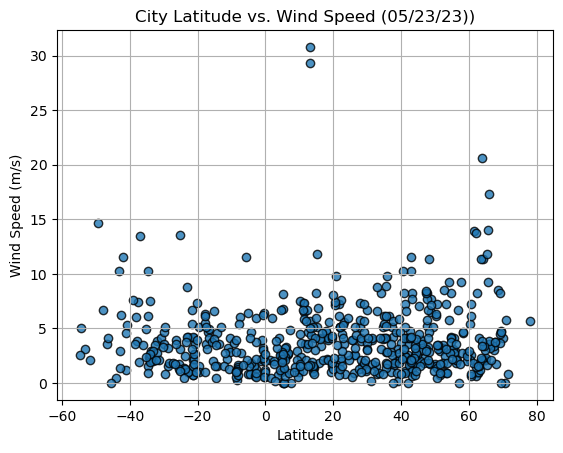

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (%s))" % time.strftime("%x"))
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="r")
    plt.xlabel("Latitude")
    plt.grid(True)
    #plt.ylabel("")
    print(f"The p-value is: {pvalue}")
    print(f"The r-value is: {rvalue}")
    #plt.show()

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,utrik,11.2278,169.8474,27.89,77,94,7.32,MH,1684873993
7,happy valley-goose bay,53.3168,-60.3315,17.17,25,75,7.20,CA,1684874558
9,mejit,10.2753,170.8646,27.70,80,100,7.51,MH,1684874128
11,bilibino,68.0546,166.4372,5.43,62,60,1.70,RU,1684874558
12,bethel,41.3712,-73.4140,22.47,56,0,4.12,US,1684874506


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <=0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,7.80,78,82,3.56,NZ,1684874557
1,puerto natales,-51.7236,-72.4875,4.25,75,40,2.06,CL,1684874557
2,grytviken,-54.2811,-36.5092,2.39,85,42,5.05,GS,1684874557
3,codrington,-38.2667,141.9667,12.86,72,100,6.02,AU,1684873972
4,waitangi,-43.9535,-176.5597,12.12,96,0,0.45,NZ,1684874557


###  Temperature vs. Latitude Linear Regression Plot

The p-value is: 1.703713867972364e-86
The r-value is: -0.7856829750061248


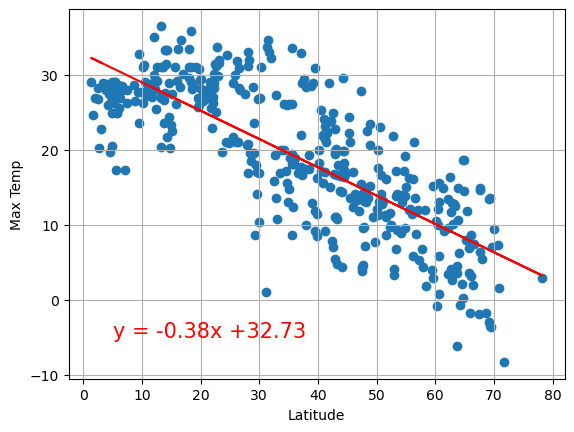

In [32]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.ylabel("Max Temp")
plot_linear_regression(x_values, y_values, "Max Temp", (5, -5))

The p-value is: 1.1277593719907114e-35
The r-value is: 0.7775263554050419


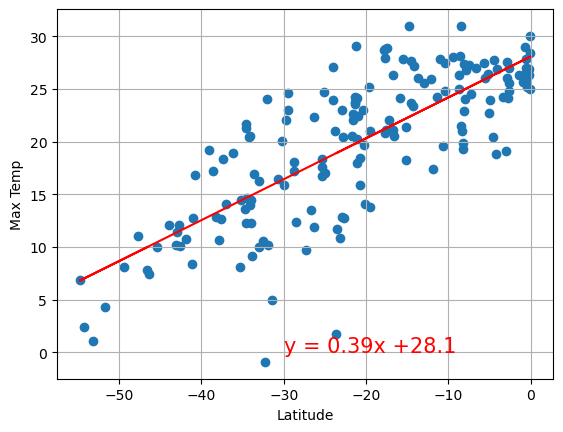

In [33]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.ylabel("Max Temp")
plot_linear_regression(x_values, y_values, "Max Temp", (-30, 0))

**Discussion about the linear relationship:** The data plots for temperature/latitude in the northern hemisphere shows a negative linear relationship, whereas the temperature/latitude for the southern hemisphere shows a positive linear relationship. 

### Humidity vs. Latitude Linear Regression Plot

The p-value is: 0.592106229806115
The r-value is: 0.02663514939696732


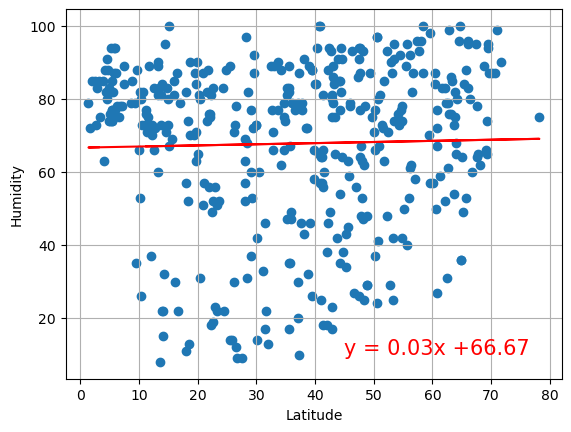

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.ylabel("Humidity")
plot_linear_regression(x_values, y_values, "Humidity", (45, 10))

The p-value is: 0.008959059657587627
The r-value is: 0.19990234394502504


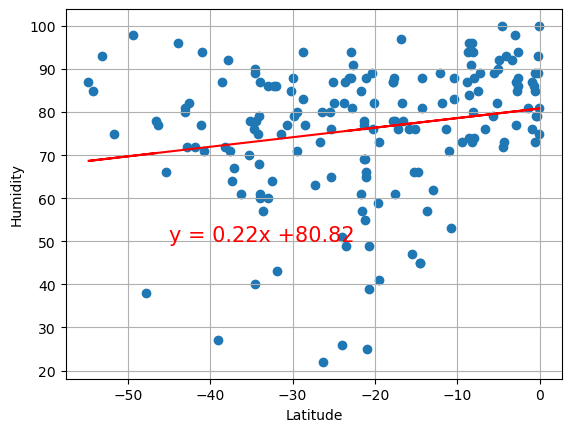

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.ylabel("Humidity")
plot_linear_regression(x_values, y_values, "Humidity", (-45, 50))

**Discussion about the linear relationship:** Both the data plots for humidity/latitude in the northern hemisphere and southern hemisphere shows a positive linear relationship; however, the southern hemisphere has a greater consistency. 

### Cloudiness vs. Latitude Linear Regression Plot

The p-value is: 0.719509313455114
The r-value is: 0.017854146187556836


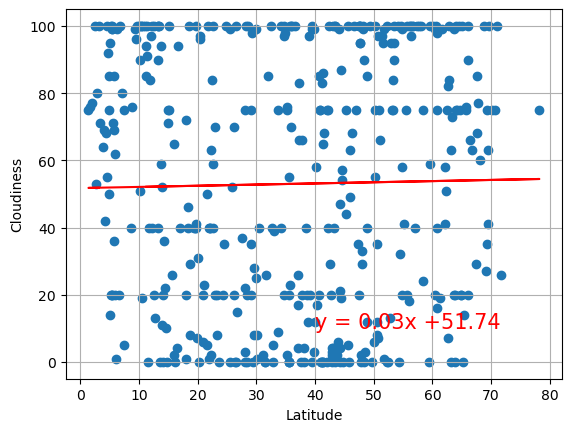

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
plot_linear_regression(x_values, y_values, "Cloudiness", (40, 10))

The p-value is: 0.056440404135309014
The r-value is: 0.14659788520871603


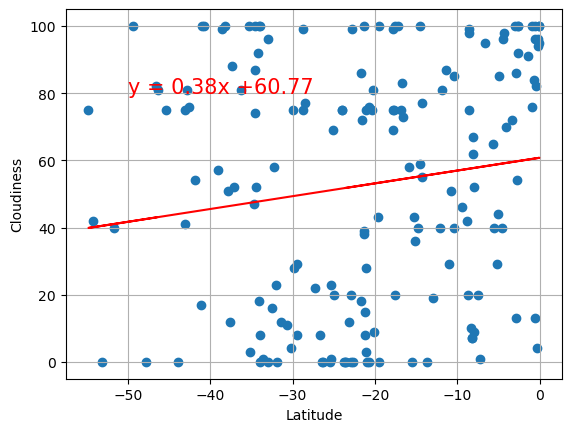

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
plot_linear_regression(x_values, y_values, "Cloudiness", (-50, 80))

**Discussion about the linear relationship:** Both the data plots for cloudiness/latitude in the northern hemisphere and southern hemisphere shows a ####linear relationship####. 

### Wind Speed vs. Latitude Linear Regression Plot

The p-value is: 0.12797014942594084
The r-value is: 0.07557494268115698


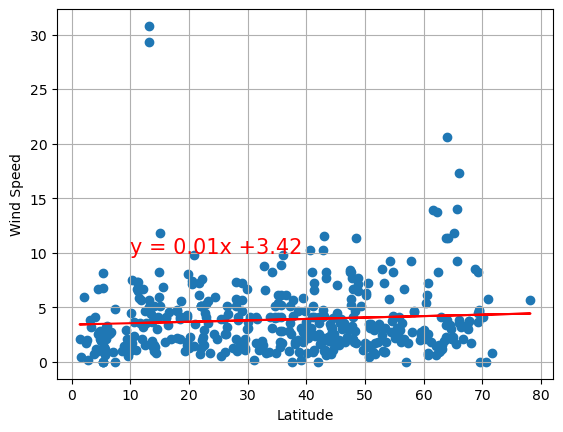

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
plot_linear_regression(x_values, y_values, "Wind Speed", (10, 10))

The p-value is: 0.0012760199415457563
The r-value is: -0.2450928102563279


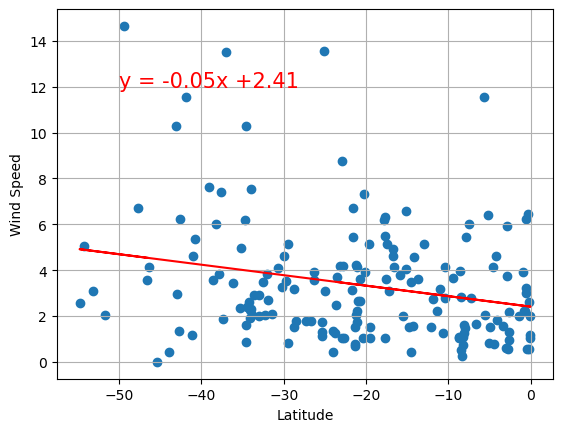

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))

**Discussion about the linear relationship:** The data plots for wind speed/latitude in the northern hemisphere shows a negative linear relationship, whereas the wind speed/latitude for the southern hemisphere shows a positive linear relationship. 